# Графовые представления

Когда у нас много данных, связанных друг с другом, бывает полезно отобразить их в виде графа. Часто такие представления используются для анализа различных сетей, в том числе и социальных. Так может выглядеть граф ваших друзей ВК:

<img src="https://habrastorage.org/getpro/habr/comment_images/381/be0/bd4/381be0bd44cb8cc84db7bdcf74ff0741.jpg" width="600px">

Научимся сегодня делать такие графы и анализировать их.

## Минутка истории: Семь мостов Кёнигсберга

Графовый подход к не-графовым задачам в какой-то степени начался с задачи про семь мостов. Звучит она так:

> Как пройти по всем городским мостам Кёнигсберга (через реку Преголя), не проходя ни по одному из них дважды?

Окончательно вопрос закрыл математик Леонид Эйлер, который составил математическую модель, где вершинами графа была земля, а рёбрами — мосты:

<img src="./bridges_graph.png" width="600px">

Так как все вершины нечётные (их них исходит нечётное количество рёбер, три или пять), пройти по всем мостам без повторов нельзя.

## Варианты практического применения

### Анализ сообществ при помощи графов

В XX веке графы начали использовать для анализа сообществ. Популярный пример — сообщество каратэ-клуба, за которым наблюдал исследователь Уэйн Захари в 1970–1972 гг. В клубе было 34 человека, включая администратора и тренера; каждая вершина (=человек) соединена с другой, если эти люди взаимодействовали вне занятий по каратэ.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Social_Network_Model_of_Relationships_in_the_Karate_Club.png" width="400px">

Затем клуб распался из-за конфликта администратора и тренера, и благодаря связям в исходной сети исследователи смогли угадать, кто останется с тренером, а кто уйдёт в другой клуб или бросит занятия:

<img src="https://www.researchgate.net/profile/Thiago_Silva8/publication/224946853/figure/fig2/AS:302557231632393@1449146673764/Illustration-of-the-Zacharys-karate-club-network-There-are-34-vertices-divided-into-two.png" width="600px">

### Цифровое литературоведение

В digital humanities сетевой анализ обрёл новую жизнь. Теперь каждая вершина — это персонаж, а ребро — факт общения персонажей между собой или их присутствие на сцене в один момент времени. Так, например, выглядит сеть трагедии «Отелло»:

<img src="./othello.png" width="600px">

## Теория: направленность, вес

**Направленностью** называют такой критерий, когда нам важно, откуда ребро выходит и куда оно приходит. На визуализациях такое помечают стрелкой. На картинке ниже направленный граф — (b).

<img src="https://www.researchgate.net/profile/Valeria_Fionda/publication/50591619/figure/fig3/AS:667872535773189@1536244629217/a-An-example-of-undirected-graph-and-b-an-example-of-directed-graph.png" width="400px">

Рёбра графа бывают **взвешенными** — это значит, что каждому ребру приписано условное число, отвечающее, например, за силу связи, расстояние между вершинами и т.п. На картинке ниже — граф станций и расстояний между ними. Расстояния указаны как вес рёбер.

<img src="https://2.bp.blogspot.com/-SXFrnohTRdA/WFftnGUHPrI/AAAAAAAACGY/bFXdTA8qJ2cLp8v4cfx9QX2zqqqkxkgAACLcB/s320/WeightedGraph.jpg">

Иногда (нечасто) вес бывает и у вершин.

## Практика: Сеть персонажей «Преступления и наказания»

Попробуем построить сеть взаимодействия персонажей с помощью автоматического извлечения имен и библиотеки для работы с графами. Разобьём большую задачу на задачи поменьше:

1. Найти в тексте все упоминания персонажей.

2. Определиться, что мы считаем достаточным критерием для того, чтобы установить связь между двумя персонажами.

3. Пройтись по всему тексту, разбитому на кусочки, а затем в каждом кусочке найти всех персонажей и «нарисовать» ребро между ними. Если ребро уже есть, прибавим ему 1, чтобы указать, что эта связь сильнее других.

Для практики понадобятся библиотеки [Natasha](https://github.com/natasha/natasha) (извлечение имён) и [networkx](https://networkx.org) (сама работа с графами).

```bash
pip3 install natasha
pip3 install networkx
```

### Извлечение имён

Named Entity Recognition — отдельная сложная задача в NLP. Библиотека `Natasha` - это готовые правиловые схемы для извлечения имен, географических названий и некоторых других типов объектов.

Попробуем экстрактор имен:

In [32]:
from natasha.extractors import NamesExtractor

In [21]:
FILE = 'pin.txt'
with open(FILE) as f:
    corpus = f.read()

In [16]:
ne = NamesExtractor()

In [60]:
ne('В Москве установили памятник Александру Сергеевичу Пушкину')

Matches('В Москве установили памятник Александру Сергеевичу Пушкину',
        [Match([MorphTagToken('Александру',
                              [29, 39),
                              'RU',
                              'I',
                              [Form('александр',
                                    Grams(NOUN,Name,anim,datv,masc,sing))]),
                MorphTagToken('Сергеевичу',
                              [40, 50),
                              'RU',
                              'I',
                              [Form('сергей',
                                    Grams(NOUN,Patr,anim,datv,masc,sing))]),
                MorphTagToken('Пушкину',
                              [51, 58),
                              'RU',
                              'I',
                              [Form('пушкин',
                                    Grams(Geox,NOUN,datv,inan,masc,sing)),
                               Form('пушкин',
                                    Grams(NOUN,Sgtm,Surn,anim,datv,masc,sing))])],
               [29, 58))])

In [23]:
%%time
res = ne(corpus)

CPU times: user 1min 16s, sys: 1 s, total: 1min 17s
Wall time: 1min 17s


Вот так выглядит одно найденное имя:

In [59]:
res[0]

Match([MorphTagToken('Раскольникова',
                     [9750, 9763),
                     'RU',
                     'I',
                     [Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,anim,gent,masc,sing)),
                      Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,accs,anim,masc,sing)),
                      Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,anim,femn,nomn,sing))])],
      [9750, 9763))

Посмотрим, что получилось из нашей книги. Чтобы получить имя, фамилию и отчество, можно их достать отдельно (обращаясь к атрибуту `.fact.middle`):

In [64]:
seen = defaultdict(int)
for idx, name in enumerate(res[1:]):
    curr = name
    value = f'{curr.fact.first or ""} {curr.fact.middle or ""} {curr.fact.last or ""}'.strip()
    seen[value] += 1

for key in sorted(seen, key=seen.get, reverse=True):
    if seen[key] > 5:
        print(key)

разумихин
соня
катерина ивановна
свидригайлов
раскольников
пётр  петрович
дуня
пульхерия александровна
авдотья романовна
порфирий
порфирий  петрович
марфа  петровна
софья  семёновна
настасья
амалия ивановна
зосим
родион  романыч
родя
лизавета
родион романович
андрей  семёнович
заметов
илья  петрович
раскольник
зосимов
николай
дмитрий прокофьич
никодим фомич
кох
дун
лебезятников
полечка
алёна ивановна
митька
аркадий иванович
иисус
сонечка
капернаумов
бакалеев
миколай
лазарь
шиллер
чебаров
прасковья павловна
излера
поленька
амалия людвиговна
родион
лёня


Иногда персонажи называются по-разному, чтобы автору не приходилось слишком много повторяться. Нам нужно сделать __маппинг__ (отображение), который каждому из распознанных вариантов сопоставит единственный унифицированный вариант имени, который мы и будем показывать потом на графе.

In [46]:
name_mapping = {
    'александр григориевич':'Александр Григорьевич Заметов',
    'заметов':'Александр Григорьевич Заметов',
    'амаль':'Амалия Людвиговна',
    'людвиговна':'Амалия Людвиговна',
    'амалия людвиговна':'Амалия Людвиговна',
    'андрей  семёнович':'Андрей Семенович Лебезятников',
    'андрей семёныч лебезятников':'Андрей Семёныч Лебезятников',
    'лебезятников':'Андрей Семёныч Лебезятников',
    'афанасий':'Афанасий Иванович Вахрушин',
    'иванович  вахрушин':'Афанасий Иванович Вахрушин',
    'зарницын':'вдова Зарницына',
    'разумихин':'Дмитрий Прокофьевич Разумихин',
    'дмитрий':'Дмитрий Прокофьевич Разумихин',
    'дмитрий прокофьич':'Дмитрий Прокофьевич Разумихин',
    'дуня':'Дуня Раскольникова',
    'авдотья романовна':'Дуня Раскольникова',
    'дун':'Дуня Раскольникова',
    'зосим':'Зосимов',
    'зосимов':'Зосимов',
    'илья  петрович':'Илья Петрович Порох',
    'капернаумов':'Капернаумов',
    'катерина ивановна':'Катерина Ивановна',
    'кох':'Кох',
    'лидочка':'Лидочка Мармеладова',
    'лизавета':'ЛизавеИвановна',
    'лизавета ивановна':'ЛизавеИвановна',
    'мармеладовая':'Мармеладова (?)',
    'марфа  петровна':'Марфа Петровна Свидригайлова',
    'марфа':'Марфа Петровна Свидригайлова',
    'николай':'Миколка',
    'коля':'Миколка',
    'настасья':'Настасья',
    'пестряков':'Пестряков',
    'пётр  петрович':'Пётр Петрович Лужин',
    'лужин':'Пётр Петрович Лужин',
    'полечка':'Полечка Мармеладова',
    'порфирий  петрович':'Порфирий Петрович',
    'порфирий':'Порфирий Петрович',
    'пульхерия александровна':'Пульхерия Александровна',
    'раскольников':'Раскольников',
    'раскольник':'Раскольников',
    'родион  романыч':'Раскольников',
    'родион':'Раскольников',
    'родя':'Раскольников',
    'свидригайлов':'Свидригайлов',
    'сонечка':'Соня Мармеладова',
    'соня':'Соня Мармеладова',
    'софья  семёновна':'Соня Мармеладова',
    'алёна ивановна':'старуха-процентщица'
}

### Совместная встречаемость

В рамках этого эксперимента мы будем считать, что персонажи связаны, если они упоминались в одном абзаце. Составим словарь, в котором будем хранить факты _совместной встречаемости_:

In [ ]:
from collections import defaultdict

In [75]:
max_dist = 100
all_pairs = defaultdict(int)

for idx, name in enumerate(res[1:]):
    prev = res[idx-1]
    curr = name
    end = curr.span[1]
    start = prev.span[0]
    value1 = f'{prev.fact.first or ""} {prev.fact.middle or ""} {prev.fact.last or ""}'.strip()
    value2 = f'{curr.fact.first or ""} {curr.fact.middle or ""} {curr.fact.last or ""}'.strip()
    if value1 in name_mapping and value2 in name_mapping:
        value1 = name_mapping.get(value1) or value1
        value2 = name_mapping.get(value2) or value2
        if end - start <= max_dist:
            if value1 > value2:
                pair = (value2, value1)
            else:
                pair = (value1, value2)
            if pair[0] != pair[1]:
                all_pairs[pair] += 1

Чтобы нормировать вес, найдем макисмальное значение и все веса в графе в будущем разделим на него:

In [53]:
max_cnt = max(all_pairs[i] for i in all_pairs)

### Создание графа

In [ ]:
import networkx as nx

Поочередно добавим все ребра графа

In [54]:
# объект класса «граф»
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    w = all_pairs[pair] / max_cnt
    # добавить в граф ребро от n1 к n2 с весом w
    G.add_edge(n1, n2, weight=w)

Разделим ребра на две группы по силе (для того чтобы выделить особенно важные на графе)

In [55]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

### Визуализация

In [ ]:
import matplotlib.pyplot as plt

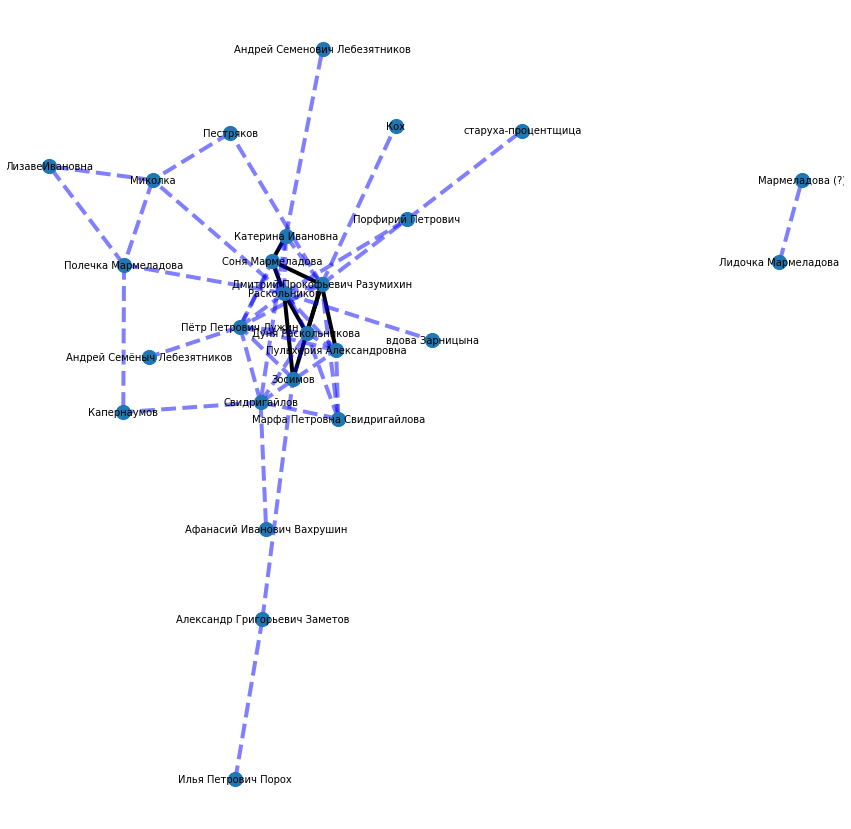

In [56]:
# у графов много разных раскладок, выбирайте по своему вкусу
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))

# рисуем вершины 
nx.draw_networkx_nodes(G, pos, node_size=200)
# рисуем популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
# рисуем менее популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='b', style='dashed')
# подписи
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

А вот все вершины графа:

In [57]:
print('\n'.join(G.nodes))

Катерина Ивановна
Раскольников
Марфа Петровна Свидригайлова
Свидригайлов
Афанасий Иванович Вахрушин
Александр Григорьевич Заметов
Илья Петрович Порох
Зосимов
Дмитрий Прокофьевич Разумихин
Пестряков
Кох
Миколка
Пётр Петрович Лужин
Лидочка Мармеладова
Мармеладова (?)
Полечка Мармеладова
Пульхерия Александровна
Дуня Раскольникова
Соня Мармеладова
Порфирий Петрович
ЛизавеИвановна
старуха-процентщица
Андрей Семёныч Лебезятников
Андрей Семенович Лебезятников
Капернаумов
вдова Зарницына


Попробуем нарисовать граф только самых важных связей с весом больше 0.5:

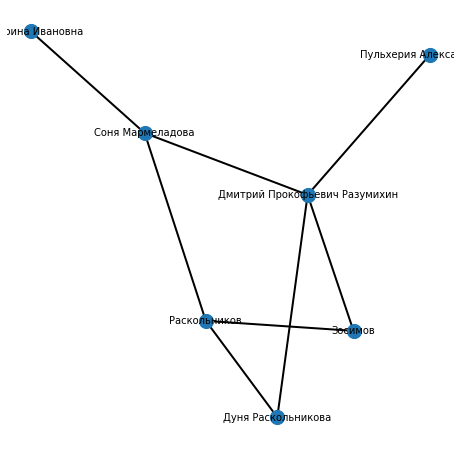

In [58]:
G2 = G.edge_subgraph(elarge)
pos = nx.spring_layout(G2)
plt.figure(figsize=(8, 8))

# рисуем вершины 
nx.draw_networkx_nodes(G2, pos, node_size=200)

# рисуем популярные свзяи
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=2)


# подписи
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

**Бонус:** попробуем операционализировать пространство героев (character-space) — в каких частях произведения встречаются те или иные герои?

In [67]:
from nltk.text import Text
from nltk.tokenize import wordpunct_tokenize
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

In [71]:
text = [morph.parse(w)[0].normal_form for w in wordpunct_tokenize(corpus)]

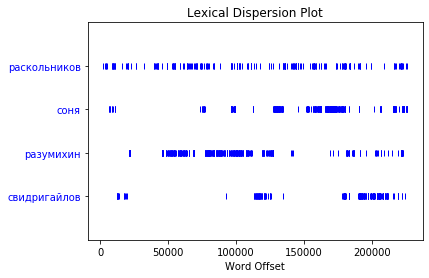

In [72]:
text = Text(text)
text.dispersion_plot(['раскольников', 'соня', 'разумихин', 'свидригайлов'])

На сайте dracor (корпус драмы) есть красивые графы для персонажей пьес

## Задание

1. Взять текст Ревизора и попробовать воспроизвести такой же граф для него
2. Перейти на сайт rusdracor [https://dracor.org/rus/gogol-revizor](https://dracor.org/rus/gogol-revizor), скачать даные для графа в формате txt и построить граф по ним - отличаются ли графы?